# How did the spreading of COVID-19 and the regulations in association with it influence the game market, in particular the game League of Legends, in terms of revenue, monthly player numbers, and popularity in Europe ?

As one knows, the spreading of the Coronavirus has lead most of the world into strong quarantine regulations. These regulations made everyone stay at home. Being made to stay at home, people started to take a bigger interest in finding new hobbies, experimenting new fields of interests and deepen there current hobbies.

Since leaving your house was an issue, all of these hobbies had to be indoor, therefore one of the booming industries next to the at-home-sports industry was the gaming market. People started to invest more into video games and sharpen their skills. But how much was the gaming industry really impacted by these changes and during which time-period was the boom the strongest? Is it really true that thanks to COVID-19 the industry started rapidly growing again?

To find an answer to these questions we first had to collect COVID-19 data.
The Data we decided to collect was the following:
- Data of each month during the first COVID-19 caused quarantine
- Number of infections per Month in correlation of population in each European country

Therefore we had to find a Data Source , which is able to deliver that data to us. To do so we have researched several APIs, which can be of use. One of these APIs is Coronavirus COVID19 API (https://rapidapi.com/api-sports/api/covid-193).

This API provides up-to-date data about Coronavirus outbreak. Including numbers about confirmed cases, deaths and recovered.

Of course since COVID is a really recent topics there were other APIs to choose from as well, the problem with these were limited rate limits, country limitations (e.g.: only the US),

# Data Source

To answer our question we have to collect data which in our case would be :
- covid 19 data (europe centered) from an api
- game data (count of players)
- league of legends data

These three main sources are here to visualize and help us understand if covid 19 had any influence on game popularity.

## COVID-19 Data

Before actually analyzing, visualizing, describing and working with the data we have to collect all the needed data.
As previously mentioned we want the data of the first every quarantine, for which the main timespan went from March 2020 til Mai 2020.

To get this Data we have to request it from our Coronavirus Tracker API. The results of these requests are going to be in json format, so we have to work with the json library as well.

In [1]:
import pandas as pd
import requests
import json
import datetime

Since we want each country we are setting up a List, which contains all countries of europe.

In [18]:
# we need the country list
# country list is parted in three seperate lists to keep the rate limit low
europe_country_list = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "Norway", "Poland","Portugal","Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine","United Kingdom", "Vatican City"]

print(f"Number of Countries: {len(europe_country_list)}" )

Number of Countries: 50


In the next step we use this list ot gather the information per month and for each country.

In [19]:
url = "https://covid-193.p.rapidapi.com/history"

headers = {
	"X-RapidAPI-Key": "ba735a5542msh0672a6a248c9225p1ba64djsnfd32c8982360",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}


### March Data

In [20]:
# collect the results for each country in that specific timeframe
# march
start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2020, 4, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/march/{country}_march.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    # set start date again
    start_date = datetime.date(2020, 3, 1)

KeyboardInterrupt: 

### April Data

In [ ]:
# april
start_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2020, 5, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/april/{country}_april.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    start_date = datetime.date(2020, 4, 1)

### Mai Data

In [ ]:
# mai
start_date = datetime.date(2020, 5, 1)
end_date = datetime.date(2020, 6, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/mai/{country}_mai.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    start_date = datetime.date(2020, 5, 1)

Now that all the data has been collected we should also take a look upon what exactly has been collected and what the data consists of. For each country in our Europe List we collected the *History* of each country. When collecting the history one gets the following data for each date passed:
- day
- number of results
- response : continent, country, population, cases, deaths, tests

We are most interested in the cases parameter alongside with which regulations where present during that time.
When looking at the cases for each date per country we get the following:
- new cases
- active cases
- critical cases
- recovered cases
- total cases

Let's take a look at one example:

In [4]:
import json

with open('covid_data/api_data/april/Albania_april.json', 'r') as handle:
    parsed = json.load(handle)

print(json.dumps(parsed, indent=4))

[
    {
        "get": "history",
        "parameters": {
            "country": "Albania",
            "day": "2020-04-01"
        },
        "errors": [],
        "results": 2,
        "response": [
            {
                "continent": "Europe",
                "country": "Albania",
                "population": null,
                "cases": {
                    "new": "+16",
                    "active": 192,
                    "critical": 8,
                    "recovered": 52,
                    "1M_pop": "90",
                    "total": 259
                },
                "deaths": {
                    "new": null,
                    "1M_pop": null,
                    "total": 15
                },
                "tests": {
                    "1M_pop": null,
                    "total": null
                },
                "day": "2020-04-01",
                "time": "2020-04-01T11:30:04+00:00"
            },
            {
                "continent": "Euro

As one can also see: for each date given we get multiple statistical responses since the covid data was obviously updated regularly over the day. We will use the latest given values of the day for our inspections. Furthermore we will only use the number of total cases, since the number of new cases has been stated differently per country ( either they say how much in comparison to before or the total number + the new number ).

So to make it easier for us we will create 3 Dataframes, in which each dataframe represents one month with countries, dates and the total cases of that date.

In [6]:
for song in parsed:
    # country
    print(song['parameters']["country"])
    # total numbers
    print(song['response'][0]["cases"]["total"])
    # date and time
    print(song['response'][0]["time"])

Albania
259
2020-04-01T11:30:04+00:00
Albania
277
2020-04-02T21:30:05+00:00
Albania
304
2020-04-03T15:30:04+00:00
Albania
333
2020-04-04T21:45:05+00:00
Albania
333
2020-04-05T10:30:06+00:00
Albania
361
2020-04-06T09:15:05+00:00
Albania
383
2020-04-07T10:00:06+00:00
Albania
383
2020-04-08T10:00:06+00:00
Albania
409
2020-04-09T17:00:17+00:00
Albania
416
2020-04-10T10:30:03+00:00
Albania
416
2020-04-11T09:30:04+00:00
Albania
433
2020-04-12T09:45:04+00:00
Albania
446
2020-04-13T10:00:05+00:00
Albania
467
2020-04-14T09:30:05+00:00
Albania
475
2020-04-15T09:17:34+00:00
Albania
494
2020-04-16T11:00:05+00:00
Albania
518
2020-04-17T09:15:04+00:00
Albania
539
2020-04-18T10:45:05+00:00
Albania
548
2020-04-19T09:45:05+00:00
Albania
562
2020-04-20T09:17:31+00:00
Albania
584
2020-04-21T09:15:04+00:00
Albania
609
2020-04-22T09:45:25+00:00
Albania
634
2020-04-23T09:15:06+00:00
Albania
663
2020-04-24T09:32:33+00:00
Albania
678
2020-04-25T10:15:05+00:00
Albania
712
2020-04-26T11:15:05+00:00
Albania
726


Now we will do exactly what we did there for each month and all the files available. If there is nothing to catch from that country in terms of total number of cases or an error has occurecd then nothing will be added to the dataframe

### April

In [7]:
# empty dataframe
april_df = pd.DataFrame(columns = ["Country", "DateTime", "Total Cases"])

In [21]:
# iterate through the folder, parse each file and add the information into the dataframe
import os
# assign directory
directory = 'covid_data/api_data/april'

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f, 'r') as handle:
        parsed = json.load(handle)
        for info in parsed:
            # country
            country = info['parameters']["country"]
            # total numbers
            total_cases = info['response'][0]["cases"]["total"]
            # date and time
            date_time = info['response'][0]["time"]
            # add this into the dataframe
            april_df = april_df.append({'Country' : country, 'DateTime' : date_time, 'Total Cases' : total_cases}, ignore_index = True)
    print(country)

Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania


### March

In [ ]:
# iterate through the folder, parse each file and add the information into the dataframe
import os
# assign directory
directory = 'covid_data/api_data/march'

march_df = pd.DataFrame(columns = ["Country", "DateTime", "Total Cases"])

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f, 'r') as handle:
        parsed = json.load(handle)
        for info in parsed:
            # country
            country = info['parameters']["country"]
            # total numbers
            total_cases = info['response'][0]["cases"]["total"]
            # date and time
            date_time = info['response'][0]["time"]
            # add this into the dataframe
            march_df = march_df.append({'Country' : country, 'DateTime' : date_time, 'Total Cases' : total_cases}, ignore_index = True)
    print(country)

### Mai

In [ ]:
# iterate through the folder, parse each file and add the information into the dataframe
import os
# assign directory
directory = 'covid_data/api_data/mai'

mai_df = pd.DataFrame(columns = ["Country", "DateTime", "Total Cases"])

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f, 'r') as handle:
        parsed = json.load(handle)
        for info in parsed:
            # country
            country = info['parameters']["country"]
            # total numbers
            total_cases = info['response'][0]["cases"]["total"]
            # date and time
            date_time = info['response'][0]["time"]
            # add this into the dataframe
            mai_df = mai_df.append({'Country' : country, 'DateTime' : date_time, 'Total Cases' : total_cases}, ignore_index = True)
    print(country)

## Enrichment - Regulations
In Big Data it is important that the Data is not only collected, but that is also has some Value. To make Data valuable we have to enrich the data, meaning we bring some context to it. This can be achieved by forming a context as said. In our case this is going to mean that just the total number of cases is not enough. Next to the cases we need the regulations the countries have set during those specific months - Were bars closed? Were the clubs closed? Were people able to meet outside ? and so on.

Since these factors are also of great importance.

To do so we have found a .csv file which provides us with all the information concerning the countries regulations and how long these regulations were up and therefore had to be followed.
This data was found on the following website: https://www.ecdc.europa.eu/en/publications-data/download-data-response-measures-covid-19

In [40]:
regulations_df = pd.read_csv("covid_data/country_regulations.csv")
regulations_df.head()

Country       Response_measure  date_start    date_end
0  Austria  AdaptationOfWorkplace  2020-03-16  2020-04-13
1  Austria  AdaptationOfWorkplace  2021-04-01  2022-03-05
2  Austria         BanOnAllEvents  2020-11-03  2021-05-18
3  Austria            ClosDaycare  2020-03-16  2020-05-04
4  Austria               ClosHigh  2020-03-16  2020-09-30

As one can see we get the Country the Response measure and the date when the measure started and until when it was present.
The Response Measures in this dataframe are:

In [37]:
regulations_df.Response_measure.unique()

array(['AdaptationOfWorkplace', 'ClosDaycare', 'ClosHigh',
       'ClosPrimPartial', 'ClosPubAny', 'ClosPubAnyPartial',
       'ClosSecPartial', 'EntertainmentVenues',
       'HotelsOtherAccommodation', 'IndoorOver100',
       'MasksVoluntaryClosedSpacesPartial', 'MassGatherAll',
       'NonEssentialShops', 'NonEssentialShopsPartial', 'OutdoorOver500',
       'PlaceOfWorship', 'PlaceOfWorshipPartial',
       'PrivateGatheringRestrictions',
       'QuarantineForInternationalTravellers', 'RestaurantsCafes',
       'StayHomeGen', 'StayHomeOrder', 'Teleworking', 'ClosPrim',
       'ClosSec', 'GymsSportsCentres', 'GymsSportsCentresPartial',
       'IndoorOver1000', 'MasksMandatoryAllSpacesPartial', 'SocialCircle',
       'BanOnAllEvents', 'BanOnAllEventsPartial', 'ClosDaycarePartial',
       'MasksMandatoryAllSpaces', 'MasksVoluntaryAllSpaces',
       'MassGather50', 'MassGather50Partial', 'MassGatherAllPartial',
       'ClosureOfPublicTransport', 'EntertainmentVenuesPartial',
       'Indoo

Those regulations mean the following:

- StayHomeOrder = Stay-at-home orders for the general population (these are enforced and also referred to as ‘lockdown’)
- RegionalStayHomeOrder = Regional stay-at-home orders for the general population at least in one region (these are enforced and also referred to as ‘lockdown’)
- StayHomeGen = Stay-at-home recommendations for the general population (which are voluntary or not enforced)
- StayHomeRiskG = Stay-at-home recommendations for risk groups or vulnerable populations (such as the elderly, people with underlying health conditions, physically disabled people, etc.)
- SocialCircle = Social circle/bubble to limit social contacts e.g. to limited number of households
- PrivateGatheringRestrictions = Restrictions on private gatherings
- ClosDaycare = Closure of educational institutions: daycare or nursery.
- ClosPrim = Closure of educational institutions: primary schools.
- ClosSec = Closure of educational institutions: secondary schools.
- ClosHigh = Closure of educational institutions: higher education
- MassGatherAll = Interventions are in place to limit mass/public gatherings (any interventions on mass gatherings up to 1000 participants included)
- BanOnAllEvents = Interventions are in place to limit all indoor/outdoor mass/public gatherings
- IndoorOver50 = Interventions are in place to limit indoor mass/public gatherings of over 50 participants
- IndoorOver100 = Interventions are in place to limit indoor mass/public gatherings of over 100 participants
- IndoorOver500 = Interventions are in place to limit indoor mass/public gatherings of over 500 participants
- IndoorOver1000 = Interventions are in place to limit indoor mass/public gatherings of over 1000 participants
- OutdoorOver50 = Interventions are in place to limit outdoor mass/public gatherings of over 50 participants
- OutdoorOver100 = Interventions are in place to limit outdoor mass/public gatherings of over 100 participants
- OutdoorOver500 = Interventions are in place to limit outdoor mass/public gatherings of over 500 participants
- OutdoorOver1000 = Interventions are in place to limit outdoor mass/public gatherings of over 1000 participants
- ClosPubAny = Closure of public spaces of any kind (including restaurants, entertainment venues, non-essential shops, partial or full closure of public transport, gyms and sport centers, etc).
- EntertainmentVenues = Closure of entertainment venues
- ClosureOfPublicTransport = Closure of public transport
- GymsSportsCentres = Closure of gyms/sports centres
- HotelsAccommodation = Closure of hotels/accommodation services
- NonEssentialShops = Closures of non-essential shops
- PlaceOfWorship = Closure of places of worship
- RestaurantsCafes = Closure of restaurants and cafes/bars
- MasksVoluntaryAllSpaces = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced)
- MasksVoluntaryClosedSpaces = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced)
- MasksMandatoryAllSpaces = Protective mask use in all public spaces on mandatory basis (enforced by law)
- MasksMandatoryClosedSpaces = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law)
- Teleworking = Teleworking recommendation
- AdaptationOfWorkplace = Adaptation of workplaces (e.g. to reduce risk of transmission)
- WorkplaceClosures = Closures of workplaces
- StayHomeOrderPartial = Stay-at-home orders for the general population (these are enforced and also referred to as ‘lockdown’) – partially relaxed measure
- RegionalStayHomeOrderPartial = Regional stay-at-home orders for the general population at least in one region (these are enforced and also referred to as ‘lockdown’) – partially relaxed measure
- StayHomeGenPartial = Stay-at-home recommendations for the general population (which are voluntary or not enforced) – partially relaxed measure
- StayHomeRiskGPartial = Stay-at-home recommendations for risk groups or vulnerable populations (such as the elderly, people with underlying health conditions, physically disabled people, etc.) – partially relaxed measure
- SocialCirclePartial = Social circle/bubble to limit social contacts e.g. to limited number of households – partially relaxed measure
- PrivateGatheringRestrictionsPartial = Restrictions on private gatherings – partially relaxed measure
- ClosDaycarePartial = Closure of educational institutions: daycare or nursery –partially relaxed measure
- ClosPrimPartial = Closure of educational institutions: primary schools – partially relaxed measure
- ClosSecPartial = Closure of educational institutions: secondary schools –partially relaxed measure
- ClosHighPartial = Closure of educational institutions: higher education – partially relaxed measure
- MassGatherAllPartial = Interventions are in place to limit mass/public gatherings (any interventions on mass gatherings up to 1000 participants included) – partially relaxed measure
- BanOnAllEventsPartial = Interventions are in place to limit all indoor/outdoor mass/public gatherings – partially relaxed measure
- IndoorOver50Partial = Interventions are in place to limit indoor mass/public gatherings of over 50 participants – partially relaxed measure
- IndoorOver100Partial = Interventions are in place to limit indoor mass/public gatherings of over 100 participants – partially relaxed measure
- IndoorOver500Partial = Interventions are in place to limit indoor mass/public gatherings of over 500 participants – partially relaxed measure
- IndoorOver1000Partial = Interventions are in place to limit indoor mass/public gatherings of over 1000 participants – partially relaxed measure
- OutdoorOver50Partial = Interventions are in place to limit outdoor mass/public gatherings of over 50 participants – partially relaxed measure
- OutdoorOver100Partial = Interventions are in place to limit outdoor mass/public gatherings of over 100 participants – partially relaxed measure
- OutdoorOver500Partial = Interventions are in place to limit outdoor mass/public gatherings of over 500 participants – partially relaxed measure
- OutdoorOver1000Partial = Interventions are in place to limit outdoor mass/public gatherings of over 1000 participants – partially relaxed measure
- ClosPubAnyPartial = Closure of public spaces of any kind (including restaurants, entertainment venues, non-essential shops, partial or full closure of public transport, gyms and sport centers etc) – partially relaxed measure
- EntertainmentVenuesPartial = Closure of entertainment venues – partially relaxed measure
- ClosureOfPublicTransportPartial = Closure of public transport – partially relaxed measure
- GymsSportsCentresPartial = Closure of gyms/sports centres – partially relaxed measure
- HotelsAccommodationPartial = Closure of hotels/accommodation services – partially relaxed measure
- NonEssentialShopsPartial = Closures of non-essential shops – partially relaxed measure
- PlaceOfWorshipPartial = Closure of places of worship – partially relaxed measure
- RestaurantsCafesPartial = Closure of restaurants and cafes/bars – partially relaxed measure
- MasksVoluntaryAllSpacesPartial = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced) – partially relaxed measure
- MasksVoluntaryClosedSpacesPartial = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced) – partially relaxed measure
- MasksMandatoryAllSpacesPartial = Protective mask use in all public spaces on mandatory basis (enforced by law) – partially relaxed measure
- MasksMandatoryClosedSpacesPartial = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law) – partially relaxed measure
- TeleworkingPartial = Teleworking recommendation or workplace closures – partially relaxed measure
- AdaptationOfWorkplacePartial = Adaptation of workplaces (e.g. to reduce risk of transmission) – partially relaxed measure
- WorkplaceClosuresPartial = Closures of workplaces – partially relaxed measure

When looking at the country we have 29 countries present in the dataset , and these are the countries we have:

In [38]:
regulations_df.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

We are short of 20 countries in this dataset, which will lead to a slight miss-interpretation.

Since we have the covid 19 numbers , as well as the incoming player counts per game seperated through months that are interesting to us we will do the exact same thing here. We will sort out every measure that has started before or after March, April or Mai.

In [41]:
# create the dataframes out of the csv based on the months in the date , since we only use 2020 data everything that was started in 2021 or any other year will be deleted
regulations_df['date_start']= pd.to_datetime(regulations_df['date_start'])
regulations_df['date_end']= pd.to_datetime(regulations_df['date_end'])

# check for correct types
print("Data types of columns: ")
print(regulations_df.dtypes)

# now let's delete all that did not start in 2020 between march and mai
# regulations_df = regulations_df[~(regulations_df['date_end'] < '2020-02-29')]
regulations_df = regulations_df[~(regulations_df['date_start'] > '2020-05-31')]
regulations_df

Data types of columns: 
Country                     object
Response_measure            object
date_start          datetime64[ns]
date_end            datetime64[ns]
dtype: object


Country       Response_measure date_start   date_end
0     Austria  AdaptationOfWorkplace 2020-03-16 2020-04-13
3     Austria            ClosDaycare 2020-03-16 2020-05-04
4     Austria               ClosHigh 2020-03-16 2020-09-30
8     Austria        ClosPrimPartial 2020-03-16 2020-05-18
9     Austria             ClosPubAny 2020-03-16 2020-04-13
...       ...                    ...        ...        ...
2007   Sweden           MassGather50 2020-03-29 2021-05-31
2009   Sweden          MassGatherAll 2020-03-12 2021-09-29
2012   Sweden          OutdoorOver50 2020-03-29 2021-05-31
2019   Sweden          StayHomeRiskG 2020-04-01 2020-10-22
2020   Sweden            Teleworking 2020-03-16 2022-03-31

[682 rows x 4 columns]

Now we want to take a look at only those regulations, that made people stay at home, spend more time on the pc. Those would include closing Pubs, prohibiting events and so on.

In [39]:
# removal of all rows that include any kind of mask regulations:
# MasksVoluntaryAllSpaces = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced)
# MasksVoluntaryClosedSpaces = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced)
# MasksMandatoryAllSpaces = Protective mask use in all public spaces on mandatory basis (enforced by law)
# MasksMandatoryClosedSpaces = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law)
regulations_df = regulations_df[regulations_df.Response_measure != "MasksVoluntaryAllSpaces"]
regulations_df = regulations_df[regulations_df.Response_measure != "MasksVoluntaryClosedSpaces"]
regulations_df = regulations_df[regulations_df.Response_measure != "MasksMandatoryAllSpaces"]
regulations_df = regulations_df[regulations_df.Response_measure != "MasksMandatoryClosedSpaces"]
regulations_df

Country       Response_measure date_start   date_end
0     Austria  AdaptationOfWorkplace 2020-03-16 2020-04-13
3     Austria            ClosDaycare 2020-03-16 2020-05-04
4     Austria               ClosHigh 2020-03-16 2020-09-30
8     Austria        ClosPrimPartial 2020-03-16 2020-05-18
9     Austria             ClosPubAny 2020-03-16 2020-04-13
...       ...                    ...        ...        ...
2007   Sweden           MassGather50 2020-03-29 2021-05-31
2009   Sweden          MassGatherAll 2020-03-12 2021-09-29
2012   Sweden          OutdoorOver50 2020-03-29 2021-05-31
2019   Sweden          StayHomeRiskG 2020-04-01 2020-10-22
2020   Sweden            Teleworking 2020-03-16 2022-03-31

[662 rows x 4 columns]

We will now take a look at the bans/restrictions and regulations in forms of graphs:

In [65]:
# we want to count the occurence per day of a certain regulation
# now lets iterate through march
march_reg_df = pd.DataFrame(columns = ["Regulation", "Date"])
start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2020, 4, 1)
delta = datetime.timedelta(days=1)

# for all unique regulations so lets itearte through the rows of the dataframe
for index, row in regulations_df.iterrows():
    start_date = datetime.date(2020, 3, 1)
    while start_date <= end_date:
        # get timedelta
        if start_date >= row["date_start"] and start_date <= row["date_end"]:
            regulation = row["Response_measure"]
            # add into dataframe
            march_reg_df = march_reg_df.append({'Regulation' : regulation, 'Date' : start_date}, ignore_index = True)
        start_date+=delta

print(march_reg_df)
# now lets create a count column and add the occurence of how many countries had that regulation on that day
march_reg_df = march_reg_df.pivot_table(columns=['Regulation','Date'], aggfunc='size')

<ipython-input-65-5bf19aa1a654>:13: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  if start_date >= row["date_start"] and start_date <= row["date_end"]:


                 Regulation        Date
0     AdaptationOfWorkplace  2020-03-16
1     AdaptationOfWorkplace  2020-03-17
2     AdaptationOfWorkplace  2020-03-18
3     AdaptationOfWorkplace  2020-03-19
4     AdaptationOfWorkplace  2020-03-20
...                     ...         ...
8429            Teleworking  2020-03-28
8430            Teleworking  2020-03-29
8431            Teleworking  2020-03-30
8432            Teleworking  2020-03-31
8433            Teleworking  2020-04-01

[8434 rows x 2 columns]


### March Regulations

Now we have a dataframe that shows us how many countries had certain regulations on each day. We can now plot all of these.

In [66]:
march_reg_df

Regulation             Date      
AdaptationOfWorkplace  2020-03-10    1
                       2020-03-11    1
                       2020-03-12    1
                       2020-03-13    1
                       2020-03-14    1
                                    ..
WorkplaceClosures      2020-03-28    5
                       2020-03-29    5
                       2020-03-30    5
                       2020-03-31    5
                       2020-04-01    5
Length: 1261, dtype: int64

In [67]:
march_reg_df = march_reg_df.reset_index()

In [69]:
march_reg_df.columns = ['Regulation', 'Date', 'num_countries']

In [70]:
march_reg_df

Regulation        Date  num_countries
0     AdaptationOfWorkplace  2020-03-10              1
1     AdaptationOfWorkplace  2020-03-11              1
2     AdaptationOfWorkplace  2020-03-12              1
3     AdaptationOfWorkplace  2020-03-13              1
4     AdaptationOfWorkplace  2020-03-14              1
...                     ...         ...            ...
1256      WorkplaceClosures  2020-03-28              5
1257      WorkplaceClosures  2020-03-29              5
1258      WorkplaceClosures  2020-03-30              5
1259      WorkplaceClosures  2020-03-31              5
1260      WorkplaceClosures  2020-04-01              5

[1261 rows x 3 columns]

In [105]:
import matplotlib.pyplot as plt

# lets clean the df a bit more
# MasksVoluntaryAllSpacesPartial = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced) – partially relaxed measure
# MasksVoluntaryClosedSpacesPartial = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced) – partially relaxed measure
# MasksMandatoryAllSpacesPartial = Protective mask use in all public spaces on mandatory basis (enforced by law) – partially relaxed measure
# MasksMandatoryClosedSpacesPartial = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law) – partially relaxed measure
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryAllSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryClosedSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryAllSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryClosedSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryAllSpaces"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryClosedSpaces"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryAllSpaces"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryClosedSpaces"]

In [106]:
import plotly.express as px

fig = px.line(march_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()


### April Regulations

Now lets take a look at the regulations present in april.

In [111]:
april_reg_df = pd.DataFrame(columns = ["Regulation", "Date"])
start_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2020, 5, 1)
delta = datetime.timedelta(days=1)

# for all unique regulations so lets itearte through the rows of the dataframe
for index, row in regulations_df.iterrows():
    start_date = datetime.date(2020, 4, 1)
    while start_date <= end_date:
        # get timedelta
        if start_date >= row["date_start"] and start_date <= row["date_end"]:
            regulation = row["Response_measure"]
            # add into dataframe
            april_reg_df = april_reg_df.append({'Regulation' : regulation, 'Date' : start_date}, ignore_index = True)
        start_date+=delta

print(april_reg_df)
# now lets create a count column and add the occurence of how many countries had that regulation on that day
april_reg_df = april_reg_df.pivot_table(columns=['Regulation','Date'], aggfunc='size')

<ipython-input-111-510dabad68ba>:11: FutureWarning:

Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.



                  Regulation        Date
0      AdaptationOfWorkplace  2020-04-01
1      AdaptationOfWorkplace  2020-04-02
2      AdaptationOfWorkplace  2020-04-03
3      AdaptationOfWorkplace  2020-04-04
4      AdaptationOfWorkplace  2020-04-05
...                      ...         ...
14317            Teleworking  2020-04-27
14318            Teleworking  2020-04-28
14319            Teleworking  2020-04-29
14320            Teleworking  2020-04-30
14321            Teleworking  2020-05-01

[14322 rows x 2 columns]


In [112]:
april_reg_df = april_reg_df.reset_index()
april_reg_df.columns = ['Regulation', 'Date', 'num_countries']

In [113]:
april_reg_df

Regulation        Date  num_countries
0        AdaptationOfWorkplace  2020-04-01              5
1        AdaptationOfWorkplace  2020-04-02              6
2        AdaptationOfWorkplace  2020-04-03              6
3        AdaptationOfWorkplace  2020-04-04              6
4        AdaptationOfWorkplace  2020-04-05              6
...                        ...         ...            ...
1814  WorkplaceClosuresPartial  2020-04-27              1
1815  WorkplaceClosuresPartial  2020-04-28              1
1816  WorkplaceClosuresPartial  2020-04-29              1
1817  WorkplaceClosuresPartial  2020-04-30              1
1818  WorkplaceClosuresPartial  2020-05-01              1

[1819 rows x 3 columns]

In [114]:
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryAllSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryClosedSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryAllSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryClosedSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryAllSpaces"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryClosedSpaces"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryAllSpaces"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryClosedSpaces"]

In [115]:
fig = px.line(april_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

### Mai Regulations

The last month we have to take a look at is Mai.

In [116]:
mai_reg_df = pd.DataFrame(columns = ["Regulation", "Date"])
start_date = datetime.date(2020, 5, 1)
end_date = datetime.date(2020, 6, 1)
delta = datetime.timedelta(days=1)

# for all unique regulations so lets itearte through the rows of the dataframe
for index, row in regulations_df.iterrows():
    start_date = datetime.date(2020, 5, 1)
    while start_date <= end_date:
        # get timedelta
        if start_date >= row["date_start"] and start_date <= row["date_end"]:
            regulation = row["Response_measure"]
            # add into dataframe
            mai_reg_df = mai_reg_df.append({'Regulation' : regulation, 'Date' : start_date}, ignore_index = True)
        start_date+=delta

print(mai_reg_df)
# now lets create a count column and add the occurence of how many countries had that regulation on that day
mai_reg_df = mai_reg_df.pivot_table(columns=['Regulation','Date'], aggfunc='size')

<ipython-input-116-d606e63849c2>:11: FutureWarning:

Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.



        Regulation        Date
0      ClosDaycare  2020-05-01
1      ClosDaycare  2020-05-02
2      ClosDaycare  2020-05-03
3      ClosDaycare  2020-05-04
4         ClosHigh  2020-05-01
...            ...         ...
13332  Teleworking  2020-05-28
13333  Teleworking  2020-05-29
13334  Teleworking  2020-05-30
13335  Teleworking  2020-05-31
13336  Teleworking  2020-06-01

[13337 rows x 2 columns]


In [117]:
mai_reg_df = mai_reg_df.reset_index()
mai_reg_df.columns = ['Regulation', 'Date', 'num_countries']

In [118]:
mai_reg_df

Regulation        Date  num_countries
0        AdaptationOfWorkplace  2020-05-01              5
1        AdaptationOfWorkplace  2020-05-02              5
2        AdaptationOfWorkplace  2020-05-03              5
3        AdaptationOfWorkplace  2020-05-04              5
4        AdaptationOfWorkplace  2020-05-05              5
...                        ...         ...            ...
1869  WorkplaceClosuresPartial  2020-05-28              1
1870  WorkplaceClosuresPartial  2020-05-29              1
1871  WorkplaceClosuresPartial  2020-05-30              1
1872  WorkplaceClosuresPartial  2020-05-31              1
1873  WorkplaceClosuresPartial  2020-06-01              1

[1874 rows x 3 columns]

In [119]:
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryAllSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryClosedSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryAllSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryClosedSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryAllSpaces"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryClosedSpaces"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryAllSpaces"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryClosedSpaces"]

In [120]:
fig = px.line(mai_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

## Game Player Count

After we took a look at the regulations all over Europe and investigated the number of total Covid 19 infections for each country for every day, we have to take a look into the third and most important aspect to answer our question: The amounts of Players the game is having.

Before we dig deeper into the amount of the assumed player growth for league of legends, we wanted to generate an overall understanding of the gaming industry during the peak of covid 19 regulations. Therefore, we looked for a dataset, that includes top games and their player counts from March till Mai of the Year 2020. We have found a DataSet on Kaggle (https://www.kaggle.com/datasets/heyrobin/video-games-stats-2019present).

The Dataset consists of the following columns:
- Name
- Month
- average_Monthly_Players
- Monthly_Gain_Loss
- Monthly_Gain_Loss_percentage
- Max_Players_per_Day

These are all very important values for our question, if Covid 19 influenced the player count in games such as League of Legends.

In [213]:
game_player_count_df = pd.read_csv('Game Player Count.csv')

In [214]:
game_player_count_df.head()

Unnamed: 0             Name           Month Average_Monthly_Players  \
0           0         v rising   June 30, 2022                  57,411   
1           1         v rising    May 30, 2022                  95,620   
2           2  forza horizon 5   June 30, 2022              23,650,588   
3           3  forza horizon 5    May 30, 2022              22,650,041   
4           4  forza horizon 5  April 30, 2022              19,688,504   

  Monthly_Gain_Loss  Monthly_Gain_Loss_percentage Max_Players_per_Day  
0           -38,209                         -40.0             146,500  
1            95,620                           0.0             152,330  
2         1,000,547                           4.0           7,095,176  
3         2,961,537                          15.0           6,795,012  
4           983,063                           5.0           5,906,551

The games that we have represented are the following:

In [215]:
game_player_count_df.Name.unique()

array(['v rising', 'forza horizon 5', 'payday 2', 'elden ring',
       'lost ark', 'splitgate', 'rust', 'yu gi oh master duel',
       'monster hunter series', 'team fortress 2 2'], dtype=object)

In [216]:
game_player_count_df

Unnamed: 0               Name              Month Average_Monthly_Players  \
0             0           v rising      June 30, 2022                  57,411   
1             1           v rising       May 30, 2022                  95,620   
2             2    forza horizon 5      June 30, 2022              23,650,588   
3             3    forza horizon 5       May 30, 2022              22,650,041   
4             4    forza horizon 5     April 30, 2022              19,688,504   
..          ...                ...                ...                     ...   
226         226  team fortress 2 2       May 30, 2019                 123,369   
227         227  team fortress 2 2     April 30, 2019                 134,595   
228         228  team fortress 2 2     March 30, 2019                 143,352   
229         229  team fortress 2 2  February 28, 2019                 149,453   
230         230  team fortress 2 2   January 30, 2019                 158,818   

    Monthly_Gain_Loss  Monthly_Gain_Loss_percentage Max_Players_per_Day  
0             -38,209                        -40.00             146,500  
1              95,620                          0.00             152,330  
2           1,000,547                          4.00           7,095,176  
3           2,961,537                         15.00           6,795,012  
4             983,063                          5.00           5,906,551  
..                ...                           ...                 ...  
226            -3,742                         -8.34              41,123  
227            -2,918                         -6.11              44,865  
228            -2,033                         -4.08              47,784  
229            -3,121                         -5.90              49,818  
230               -18                          0.00              52,939  

[231 rows x 7 columns]

Here we can see that all in all we have 231 datapoints, with 7 features , which all describe the popularity of 10 Games.

In [217]:
game_player_count_df = game_player_count_df.dropna()

In [218]:
# some data cleaning needed
# replace row 50 error: "February 28, 20222"
game_player_count_df.loc[50, 'Month'] = "February 28, 2022"

In [219]:
print(game_player_count_df.loc[50])

Unnamed: 0                                     50
Name                                     lost ark
Month                           February 28, 2022
Average_Monthly_Players                   701,550
Monthly_Gain_Loss                         290,184
Monthly_Gain_Loss_percentage                 71.0
Max_Players_per_Day                     1,403,100
Name: 50, dtype: object


In [220]:
# since they are not float64 we have to convert the column types
# for that we have to replace all the commas with a dot
game_player_count_df["Average_Monthly_Players"] = game_player_count_df["Average_Monthly_Players"].apply(lambda x: x.replace(',',''))
game_player_count_df["Max_Players_per_Day"] = game_player_count_df["Max_Players_per_Day"].apply(lambda x: x.replace(',',''))
game_player_count_df["Monthly_Gain_Loss"] = game_player_count_df["Monthly_Gain_Loss"].apply(lambda x: x.replace(',',''))

In [221]:
game_player_count_df

Unnamed: 0               Name              Month Average_Monthly_Players  \
0             0           v rising      June 30, 2022                   57411   
1             1           v rising       May 30, 2022                   95620   
2             2    forza horizon 5      June 30, 2022                23650588   
3             3    forza horizon 5       May 30, 2022                22650041   
4             4    forza horizon 5     April 30, 2022                19688504   
..          ...                ...                ...                     ...   
226         226  team fortress 2 2       May 30, 2019                  123369   
227         227  team fortress 2 2     April 30, 2019                  134595   
228         228  team fortress 2 2     March 30, 2019                  143352   
229         229  team fortress 2 2  February 28, 2019                  149453   
230         230  team fortress 2 2   January 30, 2019                  158818   

    Monthly_Gain_Loss  Monthly_Gain_Loss_percentage Max_Players_per_Day  
0              -38209                        -40.00              146500  
1               95620                          0.00              152330  
2             1000547                          4.00             7095176  
3             2961537                         15.00             6795012  
4              983063                          5.00             5906551  
..                ...                           ...                 ...  
226             -3742                         -8.34               41123  
227             -2918                         -6.11               44865  
228             -2033                         -4.08               47784  
229             -3121                         -5.90               49818  
230               -18                          0.00               52939  

[231 rows x 7 columns]

In [222]:
game_player_count_df['Average_Monthly_Players'] = pd.to_numeric(game_player_count_df['Average_Monthly_Players'], errors='coerce')
game_player_count_df['Monthly_Gain_Loss'] = pd.to_numeric(game_player_count_df['Monthly_Gain_Loss'], errors='coerce')
game_player_count_df['Max_Players_per_Day'] = pd.to_numeric(game_player_count_df['Max_Players_per_Day'], errors='coerce')

In [223]:
game_player_count_df

Unnamed: 0               Name              Month  \
0             0           v rising      June 30, 2022   
1             1           v rising       May 30, 2022   
2             2    forza horizon 5      June 30, 2022   
3             3    forza horizon 5       May 30, 2022   
4             4    forza horizon 5     April 30, 2022   
..          ...                ...                ...   
226         226  team fortress 2 2       May 30, 2019   
227         227  team fortress 2 2     April 30, 2019   
228         228  team fortress 2 2     March 30, 2019   
229         229  team fortress 2 2  February 28, 2019   
230         230  team fortress 2 2   January 30, 2019   

     Average_Monthly_Players  Monthly_Gain_Loss  Monthly_Gain_Loss_percentage  \
0                      57411             -38209                        -40.00   
1                      95620              95620                          0.00   
2                   23650588            1000547                          4.00   
3                   22650041            2961537                         15.00   
4                   19688504             983063                          5.00   
..                       ...                ...                           ...   
226                   123369              -3742                         -8.34   
227                   134595              -2918                         -6.11   
228                   143352              -2033                         -4.08   
229                   149453              -3121                         -5.90   
230                   158818                -18                          0.00   

     Max_Players_per_Day  
0               146500.0  
1               152330.0  
2              7095176.0  
3              6795012.0  
4              5906551.0  
..                   ...  
226              41123.0  
227              44865.0  
228              47784.0  
229              49818.0  
230              52939.0  

[231 rows x 7 columns]

Since here again we are working with DateTime values we will convert the Column Month to the Type DateTime.

In [224]:
game_player_count_df['Month'] = pd.to_datetime(game_player_count_df['Month'])

### Before/After Covid 19

To see the actual change of the Player count and all we will also look into the games popularity change before Covdi 19.

<AxesSubplot:xlabel='Name'>

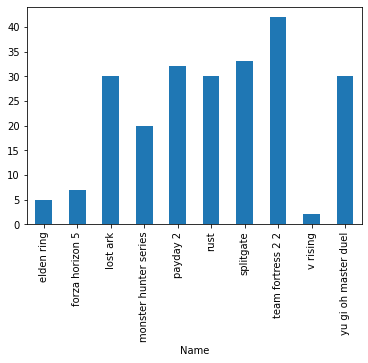

In [225]:
game_player_count_df['Month'].sort_values()
gp = game_player_count_df.groupby('Name')['Average_Monthly_Players'].count()
gp.plot.bar()

In [226]:
fig = px.line(game_player_count_df, x="Month", y="Max_Players_per_Day", color='Name')
fig.show()

In [227]:
fig = px.line(game_player_count_df, x="Month", y="Monthly_Gain_Loss_percentage", color='Name')
fig.show()

In [228]:
fig = px.line(game_player_count_df, x="Month", y="Average_Monthly_Players", color='Name')
fig.show()

As one can see:
The popularity and therefore the Numbers of Players each Month before or After Covid 19 is only different for a few games or of crucial difference-
- Games such as Elden Ring, v rising, monster hunter series and forza horizon 5 were not released yet or no data has been collected so there is no use for that to answer our question

Lets take a look at the rest of the games:
- Yu Gi Oh Masters always peaks in April (2020 and 2021) and before April 2020, the percentage of monthly avg players was at the lowest of all time that is covered in this dataset. Since the numbers do not vary a lot here we can say that in overall retrospective covid 19 did not impact this game.
- Rust has more or less the same development like Yu Gi Oh
- Splitgate peaked around the January 2021
- Lost ark peaked during February 2022, which means that Covid did not influence the game positively or negatively.

In conclusion, we can say that covid19 did not influence the popularity of one of these games significantly. Now the next question would be, if the Regulations during that time have influenced the Loss and Gain in a way ?

### During Covid 19

In [229]:
# next lets sort out the Months and only keep March till Mai 2020
game_player_count_df = game_player_count_df[~(game_player_count_df['Month'] > '2020-05-31')]
game_player_count_df = game_player_count_df[~(game_player_count_df['Month'] < '2020-02-29')]

In [230]:
game_player_count_df

Unnamed: 0                  Name      Month  Average_Monthly_Players  \
34           34              payday 2 2020-05-30                 10069419   
35           35              payday 2 2020-04-30                  9065441   
36           36              payday 2 2020-03-30                 10544021   
71           71              lost ark 2020-05-30                   387379   
72           72              lost ark 2020-04-30                   443829   
73           73              lost ark 2020-03-30                   443694   
101         101             splitgate 2020-05-30                   784035   
102         102             splitgate 2020-04-30                   774020   
103         103             splitgate 2020-03-30                   807566   
134         134                  rust 2020-05-30                 11828098   
135         135                  rust 2020-04-30                 12359395   
136         136                  rust 2020-03-30                 12917258   
164         164  yu gi oh master duel 2020-05-30                  8948171   
165         165  yu gi oh master duel 2020-04-30                  9395580   
166         166  yu gi oh master duel 2020-03-30                  9865359   
214         214     team fortress 2 2 2020-05-30                   206087   
215         215     team fortress 2 2 2020-04-30                   207303   
216         216     team fortress 2 2 2020-03-30                   210468   

     Monthly_Gain_Loss  Monthly_Gain_Loss_percentage  Max_Players_per_Day  
34             1003978                         11.00            1342589.0  
35            -1478580                        -14.00            1208725.0  
36             1038481                         10.00            1405869.0  
71              -56450                        -13.00             774758.0  
72                 135                          0.00             887658.0  
73               13853                          3.00             887388.0  
101              10016                          1.29              78404.0  
102             -33547                         -4.15              77402.0  
103               9446                          1.18              80757.0  
134            -531297                         -4.30             788540.0  
135            -557863                         -4.32             823960.0  
136            1645695                         14.60             861151.0  
164            -447409                         -5.00            1193089.0  
165            -469779                         -5.00            1252744.0  
166            1385848                         16.00            1315381.0  
214               -405                         -0.59              68696.0  
215              -1054                         -1.50              69101.0  
216               7503                         11.98              70156.0


To make sure that no duplicates are in the DataSet we checked and removed all of those.

In [231]:
print(game_player_count_df.duplicated())

34     False
35     False
36     False
71     False
72     False
73     False
101    False
102    False
103    False
134    False
135    False
136    False
164    False
165    False
166    False
214    False
215    False
216    False
dtype: bool


In [232]:
game_player_count_df.drop_duplicates(inplace=True)
print(game_player_count_df.shape)

(18, 7)


Even after the Removal of duplicates and NA-Rows, we still have the same amount of Data present.

Now that the DataFrame/DataSet we are using is cleaned and checked through , lets take a look at the Correlations of our Columns. To make sure, that we are able to do that , we have to check if all the Columns are really numerical values and no simple objects. If they are not, we have to change that.

In [233]:
game_player_count_df.dtypes

Unnamed: 0                               int64
Name                                    object
Month                           datetime64[ns]
Average_Monthly_Players                  int64
Monthly_Gain_Loss                        int64
Monthly_Gain_Loss_percentage           float64
Max_Players_per_Day                    float64
dtype: object

In [234]:
game_player_count_df.corr(method ='pearson')

Unnamed: 0  Average_Monthly_Players  \
Unnamed: 0                      1.000000                -0.146654   
Average_Monthly_Players        -0.146654                 1.000000   
Monthly_Gain_Loss              -0.015906                 0.182985   
Monthly_Gain_Loss_percentage    0.139877                 0.180713   
Max_Players_per_Day            -0.456576                 0.730090   

                              Monthly_Gain_Loss  Monthly_Gain_Loss_percentage  \
Unnamed: 0                            -0.015906                      0.139877   
Average_Monthly_Players                0.182985                      0.180713   
Monthly_Gain_Loss                      1.000000                      0.860949   
Monthly_Gain_Loss_percentage           0.860949                      1.000000   
Max_Players_per_Day                    0.164873                      0.089805   

                              Max_Players_per_Day  
Unnamed: 0                              -0.456576  
Average_Monthly_Players                  0.730090  
Monthly_Gain_Loss                        0.164873  
Monthly_Gain_Loss_percentage             0.089805  
Max_Players_per_Day                      1.000000

In case of interpretation the correlation did not help us at all, since the correlation in our case is just a mathematical correlation.

In [235]:
fig = px.line(game_player_count_df, x="Month", y="Monthly_Gain_Loss_percentage", color='Name')
fig.show()

In [236]:
fig = px.line(game_player_count_df, x="Month", y="Max_Players_per_Day", color='Name')
fig.show()

Now taking a deeper look at the Numbers from March till Mai of 2020, each game was influenced the following way: ( We will look t one game that would support our thesis and another game that declines it )

- Payday 2
PayDay 2 had the most players per day at the end of March 2020, in March the top Regulations in Europe were the closing and prohibiting all Entertainment Venues as well as the closing of all typed of Educational Institutions. In April we see a significant drop, since the game has dropped -15% , even though we have seen in the graph that the regulations did not change for april and most of Europe ( half of the Continent ) still closed Venues, banned Events as well as had Gyms and Restaurants closed. Now during Mai we can see that the amoount of Players in the game slightly increases again. This fact is really contradicting to our theory, since in May most of the Countries already opened up Pubs and restaurants as well as started to allow bigger Events and bigger Hang Outs/Festivals and more.

So in the Case of PayDay 2 the Regulations on Entertainment and Hobbies, as well as the number of Covid 19 infections, did not influence the growth or loss in players per month. Looking at the Game itself though, one notices that the Popularity of this Game must have increased and or decreased during the Riots and Protests which were being held in the US during Mai 2020, since the game is about a crime spree taking place in Washington DC.

- Lost Ark
Lost Ark is not a game which could be influenced by any political Situation, since it does not involve real world aspects ( such as League of Legends ). Looking at Lost Ark we can see that the popularity was slightly dropping before and during March 2020, but during April 2020 the max numbers of Players per Day was really consistent. Why could that be ? Since the game is an open world MMO game players have the chance of exploring the world and playing their own stories, especially during April of 2020 this was not possible because all activities were prohibited, restricted or banned, therefore gamers started fleeing more and more into games and kept living in those worlds. In May of 2020, the same month in which regulations started losing up, the avg players per month dropped up to -13% (around 100 000 players)

Now we see that not only the regulations influenced the games numbers of players, but also political aspects as well as the genre of game it is , now how is that going to look like for the game we are focused on: League of Legends.

## LoL Data

Website with Monthly Player Count:
    https://activeplayer.io/league-of-legends/

Tutorial Web Scraping:
https://www.edureka.co/blog/web-scraping-with-python/#steps

In [119]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request, urlopen

In [120]:
url = "https://activeplayer.io/league-of-legends/"
request_site = Request(url, headers={"User-Agent": "Mozilla/5.0"})
page = urlopen(request_site).read()
soup = BeautifulSoup(page, "html.parser")

In [121]:
months=[] #list to store month of an entry
avg_monthly_players=[] #list to store average monthly players
monthly_gain_or_loss=[] #list to store monthly gain/loss
peak_players_day = [] #list to store peak players in a day

In [122]:
table=soup.find('table', attrs={'id':'table_2'})
tbody = table.find('tbody')
trs = tbody.find_all('tr')

for a in trs:
    tds = a.findAll('td')

    month=tds[0]
    avg_players=tds[1]
    gain_or_loss=tds[2]
    peak_players=tds[4] #4 because one column of the page is not used
    months.append(month.text)
    avg_monthly_players.append(avg_players.text)
    monthly_gain_or_loss.append(gain_or_loss.text)
    peak_players_day.append(peak_players.text)

In [123]:
print(months)

['Last 30 Days', 'October 30, 2022', 'September 30, 2022', 'August 30, 2022', 'July 30, 2022', 'June 30, 2022', 'May 30, 2022', 'April 30, 2022', 'March 30, 2022', 'February 28, 2022', 'January 30, 2022', 'December 30, 2021', 'November 30, 2021', 'October 30, 2021', 'September 30, 2021', 'August 30, 2021', 'July 30, 2021', 'June 30, 2021', 'May 30, 2021', 'April 30, 2021', 'March 30, 2021', 'February 28, 2021', 'January 30, 2021', 'December 30, 2020', 'November 30, 2020', 'October 30, 2020', 'September 30, 2020', 'August 30, 2020', 'July 30, 2020', 'June 30, 2020', 'May 30, 2020', 'April 30, 2020', 'March 30, 2020', 'February 28, 2020', 'January 30, 2020', 'December 30, 2020', 'November 30, 2019', 'October 30, 2019', 'September 30, 2019', 'August 30, 2019', 'July 30, 2019', 'June 30, 2019', 'May 30, 2019', 'April 30, 2019', 'March 30, 2019', 'February 28, 2019', 'January 30, 2019', 'November 30, 2018']


In [124]:
print(avg_monthly_players)

['149,980,576', '150,908,760', '151,102,355', '150,130,018', '149,906,790', '151,281,358', '152,951,432', '152,366,661', '153,312,677', '155,556,231', '153,307,011', '154,981,226', '150,367,689', '149,255,912', '151,297,082', '151,851,490', '153,315,685', '151,636,687', '146,868,113', '143,802,678', '145,603,491', '142,823,579', '140,949,027', '146,507,849', '142,217,348', '118,786,886', '123,707,185', '131,067,188', '134,338,301', '137,710,582', '141,187,161', '154,624,462', '144,947,212', '134,551,212', '131,285,212', '124,937,212', '116,011,924', '107,857,714', '106,287,346', '102,238,039', '109,559,185', '99,852,997', '110,180,381', '115,281,293', '138,633,266', '133,952,160', '135,080,060', '25,301,212']


In [125]:
df = pd.DataFrame({'Month':months,'average monthly players':avg_monthly_players,'monthly gain/loss':monthly_gain_or_loss, 'peak players in a day':peak_players_day})

In [126]:
df.head()

Month average monthly players monthly gain/loss  \
0        Last 30 Days             149,980,576          -928,184   
1    October 30, 2022             150,908,760          -193,595   
2  September 30, 2022             151,102,355           972,337   
3     August 30, 2022             150,130,018           223,228   
4       July 30, 2022             149,906,790        -1,374,568   

  peak players in a day  
0            13,498,252  
1            13,581,788  
2            13,599,212  
3            13,511,702  
4            13,491,611

In [128]:
df.describe()

Month average monthly players monthly gain/loss  \
count                  48                      48                48   
unique                 47                      48                48   
top     December 30, 2020             149,980,576          -928,184   
freq                    2                       1                 1   

       peak players in a day  
count                     48  
unique                    48  
top               13,498,252  
freq                       1

In [163]:
df

Month average monthly players monthly gain/loss  \
0         Last 30 Days             149,980,576          -928,184   
1     October 30, 2022             150,908,760          -193,595   
2   September 30, 2022             151,102,355           972,337   
3      August 30, 2022             150,130,018           223,228   
4        July 30, 2022             149,906,790        -1,374,568   
5        June 30, 2022             151,281,358        -1,670,074   
6         May 30, 2022             152,951,432           584,771   
7       April 30, 2022             152,366,661          -946,016   
8       March 30, 2022             153,312,677        -2,243,554   
9    February 28, 2022             155,556,231         2,249,220   
10    January 30, 2022             153,307,011        -1,674,215   
11   December 30, 2021             154,981,226         4,613,537   
12   November 30, 2021             150,367,689         1,111,777   
13    October 30, 2021             149,255,912        -2,041,170   
14  September 30, 2021             151,297,082          -554,408   
15     August 30, 2021             151,851,490        -1,464,195   
16       July 30, 2021             153,315,685         1,678,998   
17       June 30, 2021             151,636,687         4,768,574   
18        May 30, 2021             146,868,113         3,065,435   
19      April 30, 2021             143,802,678        -1,800,813   
20      March 30, 2021             145,603,491         2,779,912   
21   February 28, 2021             142,823,579         1,874,552   
22    January 30, 2021             140,949,027        -5,558,822   
23   December 30, 2020             146,507,849         4,290,500   
24   November 30, 2020             142,217,348        23,430,462   
25    October 30, 2020             118,786,886        -4,920,299   
26  September 30, 2020             123,707,185        -7,360,004   
27     August 30, 2020             131,067,188        -3,271,113   
28       July 30, 2020             134,338,301        -3,372,281   
29       June 30, 2020             137,710,582        -3,476,578   
30        May 30, 2020             141,187,161       -13,437,302   
31      April 30, 2020             154,624,462         9,677,250   
32      March 30, 2020             144,947,212        10,396,000   
33   February 28, 2020             134,551,212         3,266,000   
34    January 30, 2020             131,285,212         6,348,000   
35   December 30, 2020             124,937,212         8,925,288   
36   November 30, 2019             116,011,924         8,154,210   
37    October 30, 2019             107,857,714         1,570,368   
38  September 30, 2019             106,287,346         4,049,307   
39     August 30, 2019             102,238,039        -7,321,146   
40       July 30, 2019             109,559,185         9,706,188   
41       June 30, 2019              99,852,997       -10,327,384   
42        May 30, 2019             110,180,381        -5,100,912   
43      April 30, 2019             115,281,293       -23,351,973   
44      March 30, 2019             138,633,266         4,681,107   
45   February 28, 2019             133,952,160        -1,127,900   
46    January 30, 2019             135,080,060        -7,727,152   
47   November 30, 2018              25,301,212                     

   peak players in a day  
0             13,498,252  
1             13,581,788  
2             13,599,212  
3             13,511,702  
4             13,491,611  
5             13,615,322  
6             13,765,629  
7             13,712,999  
8             13,798,141  
9             14,000,061  
10            13,797,631  
11            13,948,310  
12            13,533,092  
13            13,433,032  
14            13,616,737  
15            13,666,634  
16            13,798,412  
17            13,647,302  
18            13,218,130  
19            12,942,241  
20            13,104,314  
21            12,854,122  
22            12,685,412  
23            13,185,706  
24       

In [159]:
import calendar

months = {month: index for index, month in enumerate(calendar.month_name) if month}
months = months | {'Last':13}
print(months.get('January'))
# {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

1
October 30, 2022 %Y-%m-%d %H:%M:%S


TypeError: strptime() takes exactly 2 arguments (1 given)

In [165]:
df_date = df.copy()
df_date[['Date','Day', 'Year']] = df_date.Month.str.split(expand=True)
df_date['Date'] = df_date['Date'].replace(months)
df_date.head()

Month average monthly players monthly gain/loss  \
0        Last 30 Days             149,980,576          -928,184   
1    October 30, 2022             150,908,760          -193,595   
2  September 30, 2022             151,102,355           972,337   
3     August 30, 2022             150,130,018           223,228   
4       July 30, 2022             149,906,790        -1,374,568   

  peak players in a day  Date  Day  Year  
0            13,498,252    13   30  Days  
1            13,581,788    10  30,  2022  
2            13,599,212     9  30,  2022  
3            13,511,702     8  30,  2022  
4            13,491,611     7  30,  2022

In [175]:
month_date = str(df_date.Day[1]) + " " + str(df_date.Date[1]) + " " +  str(df_date.Year[1])

In [176]:
print(month_date)

30, 10 2022


In [177]:
#date = '2021-05-21 11:22:03'
#datem = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")

print(df['Month'][1],"%Y-%m-%d %H:%M:%S")
print(datetime.datetime.strptime(month_date, "%d, %m %Y"))

October 30, 2022 %Y-%m-%d %H:%M:%S
2022-10-30 00:00:00


# Overall Conclusion and Answer to our Question